##### Problem Statement :

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia.  

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.


## House Price Prediction using Linear, Ridge and Lasso Regression

The solution is divided into the following sections: 
- Data understanding and exploration
- Data cleaning
- Data preparation
- Model building and evaluation


### 1. Data Understanding

Let's first have a look at the dataset and understand the size, attribute names etc.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score


# Import libraries for model building - dataset spliting, feature selection, cross validation etc.
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.feature_selection import RFE




# rows and columns display limit
pd.set_option("display.max_rows",500)
pd.set_option("display.max_columns",500)

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')

# datetime library Import
from datetime import date

In [2]:
# reading the dataset
house_df = pd.read_csv("train.csv")

In [3]:
# summary of the dataset:
print(house_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

#### Inference from above : There are columns with integer values, float and object datatype.

In [4]:
# View the top 5 data
house_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
#Check the shape of dataframe 
house_df.shape

(1460, 81)

#### Inference from above : There are 81 coumns and 1460 rows present in the data

### Analyzing the data for NaN values

In [6]:
#Print statistics information
house_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


#### Inference from above :There seems to be high variation between 75th percentile and maximum values for columns (e.g. LotArea,MasVnrArea etc...) This could be because of outliers present in the data.

In [7]:
# Null value analysis : Check how much percentage of the data in each column holds null value
(house_df.isnull().sum() / len(house_df.index)*100).sort_values(ascending = False)

PoolQC           99.520548
MiscFeature      96.301370
Alley            93.767123
Fence            80.753425
FireplaceQu      47.260274
LotFrontage      17.739726
GarageYrBlt       5.547945
GarageCond        5.547945
GarageType        5.547945
GarageFinish      5.547945
GarageQual        5.547945
BsmtFinType2      2.602740
BsmtExposure      2.602740
BsmtQual          2.534247
BsmtCond          2.534247
BsmtFinType1      2.534247
MasVnrArea        0.547945
MasVnrType        0.547945
Electrical        0.068493
Id                0.000000
Functional        0.000000
Fireplaces        0.000000
KitchenQual       0.000000
KitchenAbvGr      0.000000
BedroomAbvGr      0.000000
HalfBath          0.000000
FullBath          0.000000
BsmtHalfBath      0.000000
TotRmsAbvGrd      0.000000
GarageCars        0.000000
GrLivArea         0.000000
GarageArea        0.000000
PavedDrive        0.000000
WoodDeckSF        0.000000
OpenPorchSF       0.000000
EnclosedPorch     0.000000
3SsnPorch         0.000000
S

#### Inference from above :
1. The SalePrice is the Target variable hence we need to find the factors that affect SalesPrice
2. The unique identified column is not useful as it is redundant for prediction, hence it can be deleted during data cleaning
3. There are 19 coulmns with Null values which requires imputation or removal of rows or removal of columns

## 2. Data Cleaning


#### Data Preparation

Let's now prepare the data and build the model.

In [8]:
#Null value cleaning - Remove columns with high number of Null values ( > 40%)
house_null = ['PoolQC','MiscFeature','Alley','Fence','FireplaceQu']
house_df.drop(house_null,axis=1,inplace=True)

In [9]:
#Check data after Null value removal
house_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


In [10]:
#Remove id column as it is redundant
house_id = ['Id']
house_df.drop(house_id,axis=1,inplace=True)

In [11]:
#Check shape of dataframe 
house_df.shape

(1460, 75)

#### Inference from above : After the columns with Null value and redundant data removal, there are 75 columns and 1460 rows present

In [12]:
#Check if the columns with Null values more than 40% are removed.
(house_df.isnull().sum() / len(house_df.index)*100).sort_values(ascending = False)

LotFrontage      17.739726
GarageType        5.547945
GarageYrBlt       5.547945
GarageFinish      5.547945
GarageQual        5.547945
GarageCond        5.547945
BsmtFinType2      2.602740
BsmtExposure      2.602740
BsmtQual          2.534247
BsmtCond          2.534247
BsmtFinType1      2.534247
MasVnrArea        0.547945
MasVnrType        0.547945
Electrical        0.068493
KitchenAbvGr      0.000000
BedroomAbvGr      0.000000
HalfBath          0.000000
FullBath          0.000000
BsmtHalfBath      0.000000
BsmtFullBath      0.000000
KitchenQual       0.000000
GrLivArea         0.000000
TotRmsAbvGrd      0.000000
Functional        0.000000
MSSubClass        0.000000
Fireplaces        0.000000
ScreenPorch       0.000000
SaleCondition     0.000000
SaleType          0.000000
YrSold            0.000000
MoSold            0.000000
MiscVal           0.000000
PoolArea          0.000000
3SsnPorch         0.000000
2ndFlrSF          0.000000
EnclosedPorch     0.000000
OpenPorchSF       0.000000
W

#### Seems there are Null values present in some columns (e.g. LotFrontage ~17%), check if they can be imputed

In [13]:
#Group columns with numerical value for univariate analysis and imputation 
house_numerical = house_df.select_dtypes(include = ['number']).columns.values
print(house_numerical)

['MSSubClass' 'LotFrontage' 'LotArea' 'OverallQual' 'OverallCond'
 'YearBuilt' 'YearRemodAdd' 'MasVnrArea' 'BsmtFinSF1' 'BsmtFinSF2'
 'BsmtUnfSF' 'TotalBsmtSF' '1stFlrSF' '2ndFlrSF' 'LowQualFinSF'
 'GrLivArea' 'BsmtFullBath' 'BsmtHalfBath' 'FullBath' 'HalfBath'
 'BedroomAbvGr' 'KitchenAbvGr' 'TotRmsAbvGrd' 'Fireplaces' 'GarageYrBlt'
 'GarageCars' 'GarageArea' 'WoodDeckSF' 'OpenPorchSF' 'EnclosedPorch'
 '3SsnPorch' 'ScreenPorch' 'PoolArea' 'MiscVal' 'MoSold' 'YrSold'
 'SalePrice']


In [14]:
#Find the percentage of Null values corresponding to numeric variables
house_num_null_percentage = (house_df[house_numerical ].isnull().sum()/
                              (len(house_df.index))*100).sort_values(ascending = False)
print(house_num_null_percentage)

LotFrontage      17.739726
GarageYrBlt       5.547945
MasVnrArea        0.547945
OpenPorchSF       0.000000
KitchenAbvGr      0.000000
TotRmsAbvGrd      0.000000
Fireplaces        0.000000
GarageCars        0.000000
GarageArea        0.000000
WoodDeckSF        0.000000
MSSubClass        0.000000
BedroomAbvGr      0.000000
3SsnPorch         0.000000
ScreenPorch       0.000000
PoolArea          0.000000
MiscVal           0.000000
MoSold            0.000000
YrSold            0.000000
EnclosedPorch     0.000000
FullBath          0.000000
HalfBath          0.000000
BsmtFinSF2        0.000000
LotArea           0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
BsmtFinSF1        0.000000
BsmtUnfSF         0.000000
BsmtHalfBath      0.000000
TotalBsmtSF       0.000000
1stFlrSF          0.000000
2ndFlrSF          0.000000
LowQualFinSF      0.000000
GrLivArea         0.000000
BsmtFullBath      0.000000
SalePrice         0.000000
d

<AxesSubplot:xlabel='LotFrontage'>

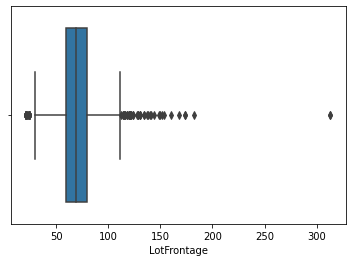

In [15]:
#LotFrontage has >17% of Null values. Understand the data to decide imputation method.
#Plot boxplot to analyze the outliers LotFrontage.
sns.boxplot(house_df['LotFrontage'])

In [16]:
#As there are outliers, it is better to impute with median
house_df['LotFrontage']= house_df.LotFrontage.fillna(house_df.LotFrontage.median())
#Check if the Null values are filled
house_df['LotFrontage'].isnull().sum()

0

<AxesSubplot:xlabel='GarageYrBlt'>

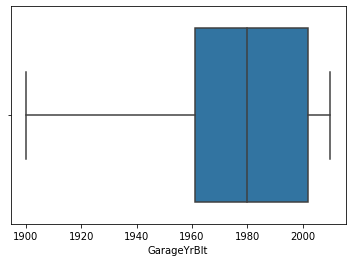

In [17]:
#GarageYrBlt has >5% of Null values. Understand the data to decide imputation method.
sns.boxplot(house_df['GarageYrBlt'])

####Inference from above - From data dictionary, it is understood that YearRemodAdd can be used to impute GarageYrBlt.

In [18]:
#YearRemodAdd is used to impute GarageYrBlt
house_df['GarageYrBlt']= house_df.GarageYrBlt.fillna(house_df.YearRemodAdd) 

In [19]:
#Check if Null values are removed
house_df['GarageYrBlt'].isnull().sum()

0

In [20]:
# Delete rows which are Null and just ~0.5% e.g. MasVnrArea
house_df = house_df.dropna(axis=0, subset=('MasVnrArea',))

In [21]:
#Check if Null values are removed
house_df['MasVnrArea'].isnull().sum()

0

In [22]:
#Group columns with categorical value for univariate analysis and imputation 
house_categorical = house_df.select_dtypes(exclude =["number"]).columns.values
print(house_categorical)

['MSZoning' 'Street' 'LotShape' 'LandContour' 'Utilities' 'LotConfig'
 'LandSlope' 'Neighborhood' 'Condition1' 'Condition2' 'BldgType'
 'HouseStyle' 'RoofStyle' 'RoofMatl' 'Exterior1st' 'Exterior2nd'
 'MasVnrType' 'ExterQual' 'ExterCond' 'Foundation' 'BsmtQual' 'BsmtCond'
 'BsmtExposure' 'BsmtFinType1' 'BsmtFinType2' 'Heating' 'HeatingQC'
 'CentralAir' 'Electrical' 'KitchenQual' 'Functional' 'GarageType'
 'GarageFinish' 'GarageQual' 'GarageCond' 'PavedDrive' 'SaleType'
 'SaleCondition']


In [23]:
#Find the percentage of Null values corresponding to categoric variables
house_cat_null_percentage = (house_df[house_categorical].isnull().sum()/
                              (len(house_df.index))*100).sort_values(ascending = False)
print(house_cat_null_percentage)

GarageCond       5.578512
GarageQual       5.578512
GarageFinish     5.578512
GarageType       5.578512
BsmtExposure     2.617080
BsmtFinType2     2.617080
BsmtQual         2.548209
BsmtCond         2.548209
BsmtFinType1     2.548209
Electrical       0.068871
HeatingQC        0.000000
Heating          0.000000
MSZoning         0.000000
CentralAir       0.000000
Street           0.000000
Functional       0.000000
PavedDrive       0.000000
SaleType         0.000000
KitchenQual      0.000000
Foundation       0.000000
ExterCond        0.000000
ExterQual        0.000000
LotShape         0.000000
LandContour      0.000000
Utilities        0.000000
LotConfig        0.000000
LandSlope        0.000000
Neighborhood     0.000000
Condition1       0.000000
Condition2       0.000000
BldgType         0.000000
HouseStyle       0.000000
RoofStyle        0.000000
RoofMatl         0.000000
Exterior1st      0.000000
Exterior2nd      0.000000
MasVnrType       0.000000
SaleCondition    0.000000
dtype: float

In [24]:

# Replace null values with 'No Basement'
house_df['BsmtExposure'] = house_df['BsmtExposure'].fillna('No Basement')
house_df['BsmtFinType2'] = house_df['BsmtFinType2'].fillna('No Basement')
house_df['BsmtFinType1'] = house_df['BsmtFinType1'].fillna('No Basement')
house_df['BsmtCond'] = house_df['BsmtCond'].fillna('No Basement')
house_df['BsmtQual'] = house_df['BsmtQual'].fillna('No Basement')

# Replace null values with No Garrage
house_df['GarageType'] = house_df['GarageType'].fillna('No Garage')
house_df['GarageFinish'] = house_df['GarageFinish'].fillna('No Garage')
house_df['GarageCond'] = house_df['GarageCond'].fillna('No Garage')
house_df['GarageQual'] = house_df['GarageQual'].fillna('No Garage')

#Remove rows where 'Electrical' values are null as it is only 0.068 %
house_df = house_df.dropna(axis=0, subset=('Electrical',))

In [25]:
# Check whether the Null values are removed for categorical variables
house_cat_null_percentage = (house_df[house_categorical].isnull().sum()/
                              (len(house_df.index))*100).sort_values(ascending = False)
print(house_cat_null_percentage)

MSZoning         0.0
Electrical       0.0
BsmtCond         0.0
BsmtExposure     0.0
BsmtFinType1     0.0
BsmtFinType2     0.0
Heating          0.0
HeatingQC        0.0
CentralAir       0.0
KitchenQual      0.0
Street           0.0
Functional       0.0
GarageType       0.0
GarageFinish     0.0
GarageQual       0.0
GarageCond       0.0
PavedDrive       0.0
SaleType         0.0
BsmtQual         0.0
Foundation       0.0
ExterCond        0.0
ExterQual        0.0
LotShape         0.0
LandContour      0.0
Utilities        0.0
LotConfig        0.0
LandSlope        0.0
Neighborhood     0.0
Condition1       0.0
Condition2       0.0
BldgType         0.0
HouseStyle       0.0
RoofStyle        0.0
RoofMatl         0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
SaleCondition    0.0
dtype: float64


In [26]:
#Check the size of data after data cleaning
house_df.shape

(1451, 75)

#### Inference from above : After Data cleaning there are 1451 rows and 75 coumns remaining

#### Convert numerical values to categorical

In [27]:
# Based on Data dictionary, the numerical values are converted to categorical to avoid giving weightage unnecessarily


house_df['OverallQual']=house_df['OverallQual'].replace({ 10:'Very Excellent',
       9:'Excellent',
       8:'Very Good',
       7:'Good',
       6:'Above Average',
       5:'Average',
       4:'Below Average',
       3:'Fair',
       2:'Poor',
       1:'Very Poor'})

house_df['MSSubClass']=house_df['MSSubClass'].replace({20:'1-STORY 1946 & NEWER ALL STYLES',30:'1-STORY 1945 & OLDER',40:'1-STORY W/FINISHED ATTIC ALL AGES',
        45:'1-1/2 STORY - UNFINISHED ALL AGES',
        50:'1-1/2 STORY FINISHED ALL AGES',
        60:'2-STORY 1946 & NEWER',
        70:'2-STORY 1945 & OLDER',
        75:'2-1/2 STORY ALL AGES',
        80:'SPLIT OR MULTI-LEVEL',
        85:'SPLIT FOYER',
        90:'DUPLEX - ALL STYLES AND AGES',
       120:'1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
       150:'1-1/2 STORY PUD - ALL AGES',
       160:'2-STORY PUD - 1946 & NEWER',
       180:'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',
       190:'2 FAMILY CONVERSION - ALL STYLES AND AGES'})

house_df['OverallCond']=house_df['OverallCond'].replace({ 10:'Very Excellent',
       9:'Excellent',
       8:'Very Good',
       7:'Good',
       6:'Above Average',
       5:'Average',
       4:'Below Average',
       3:'Fair',
       2:'Poor',
       1:'Very Poor'})

In [28]:
#View top 5 rows
house_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,2-STORY 1946 & NEWER,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Good,Average,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,1-STORY 1946 & NEWER ALL STYLES,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Above Average,Very Good,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,2-STORY 1946 & NEWER,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Good,Average,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,2-STORY 1945 & OLDER,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Good,Average,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,2-STORY 1946 & NEWER,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Very Good,Average,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


### EDA - Exploratory Data Analysis
-Univariate Analysis
To perform analysis of individual variables against derived information from it (e.g. Variable vs Count)

-Bivariate Analysis
To perform linear regression, the (numeric) target variable should be linearly related to *at least one another numeric variable*. 

In [29]:
# Group all numeric (float and int) variables in the dataset
house_numeric = house_df.select_dtypes(include=['float64', 'int64'])


In [30]:
# Group all categorical values in the dataset
house_categ = house_df.select_dtypes(include=['object'])
house_categ.columns

Index(['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType',
       'SaleCondition'],
      dtype='object')

In [31]:
#View top 5 rows of the categorical dataframe
house_categ.head()

,MSSubClass,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,2-STORY 1946 & NEWER,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Good,Average,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,1-STORY 1946 & NEWER ALL STYLES,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Above Average,Very Good,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,2-STORY 1946 & NEWER,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Good,Average,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,2-STORY 1945 & OLDER,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Good,Average,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,2-STORY 1946 & NEWER,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Very Good,Average,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


<AxesSubplot:xlabel='count', ylabel='Neighborhood'>

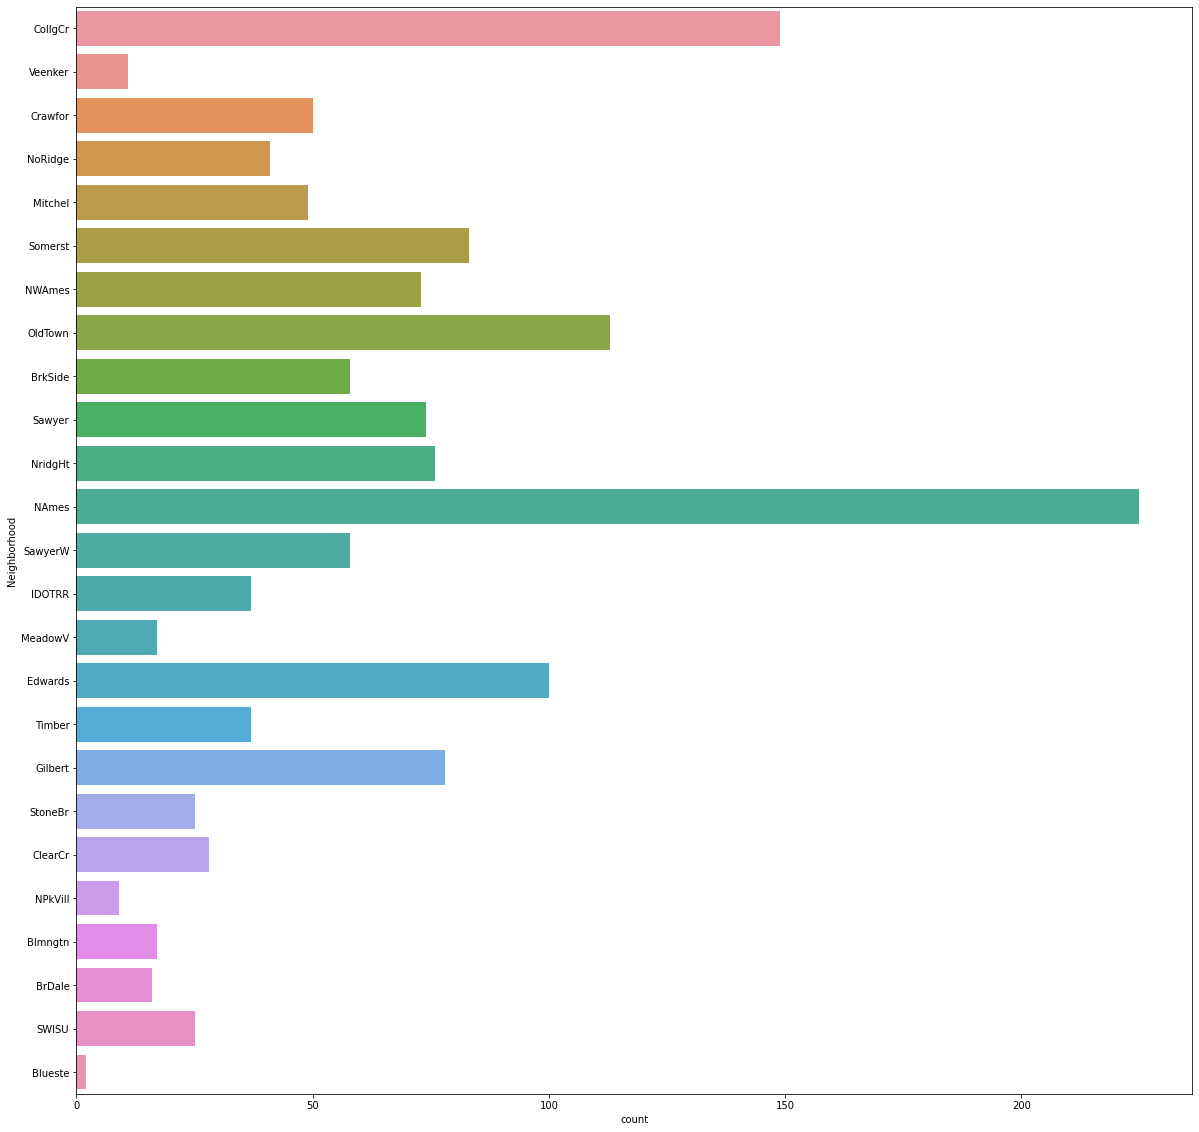

In [32]:
# Set the figure size for countplot
plt.figure(figsize = (20,20))
#Draw countplot using sns
sns.countplot(data=house_df,y='Neighborhood')

#### Inference from above : There are more houses from North Ames available in the dataset.

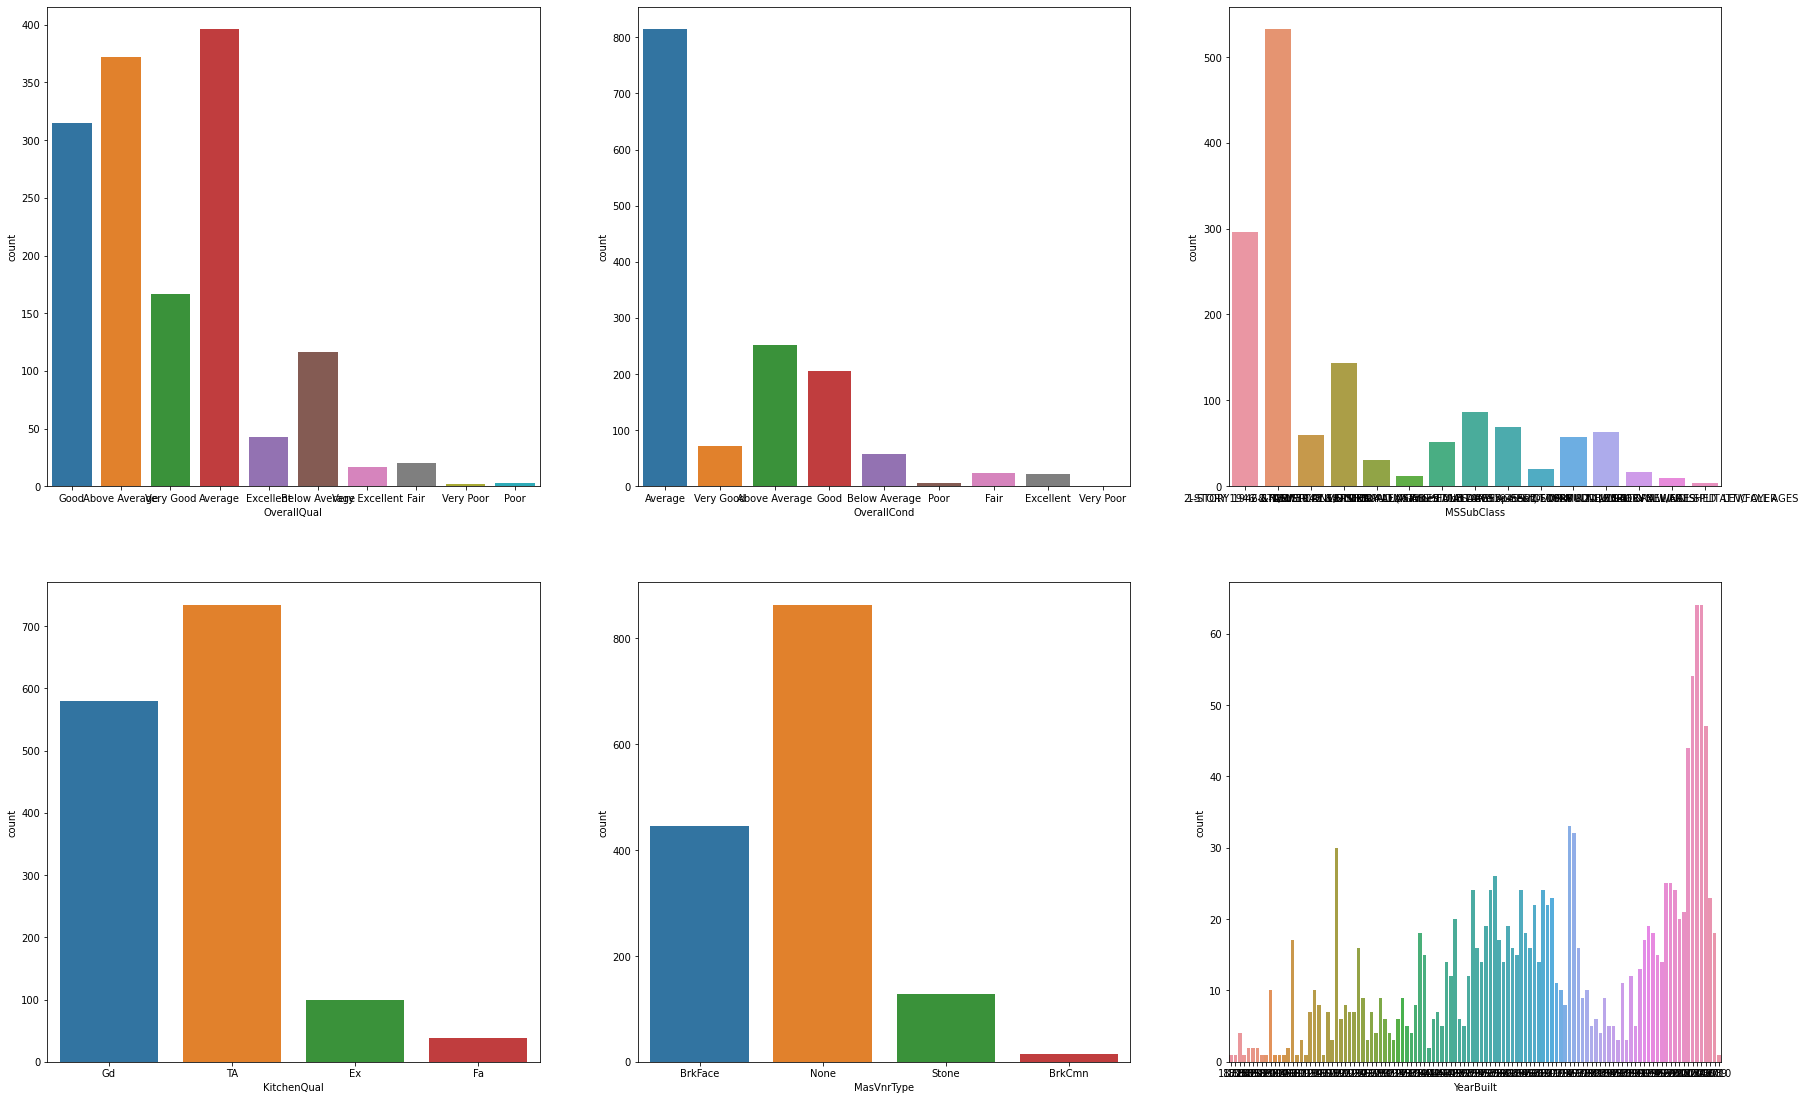

In [33]:
#Visualising categorical Variables to understand data better by picking them randomly based on the significance -
#as understood from the dataset
plt.figure(figsize=(30, 30))
plt.subplot(3,3,1)
sns.countplot(x ='OverallQual', data = house_df)
plt.subplot(3,3,2)
sns.countplot(x ='OverallCond', data = house_df)
plt.subplot(3,3,3)
sns.countplot(x = 'MSSubClass', data = house_df)
plt.subplot(3,3,4)
sns.countplot(x = 'KitchenQual',  data = house_df)
plt.subplot(3,3,5)
sns.countplot(x = 'MasVnrType', data = house_df)
plt.subplot(3,3,6)
sns.countplot(x = 'YearBuilt', data = house_df)
plt.show()



#### Inference from above : The above key variables seems to communicate valid information and doesn't need any action.

### Derived variable creation - Derive age of building from YearBuilt column

In [34]:
# Current year from today's data
curr_year = date.today().year

#Adding Age column in DataFrame to display age of the building
house_df['HouseAge'] = curr_year - house_df['YearBuilt']

house_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1451 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1451 non-null   object 
 1   MSZoning       1451 non-null   object 
 2   LotFrontage    1451 non-null   float64
 3   LotArea        1451 non-null   int64  
 4   Street         1451 non-null   object 
 5   LotShape       1451 non-null   object 
 6   LandContour    1451 non-null   object 
 7   Utilities      1451 non-null   object 
 8   LotConfig      1451 non-null   object 
 9   LandSlope      1451 non-null   object 
 10  Neighborhood   1451 non-null   object 
 11  Condition1     1451 non-null   object 
 12  Condition2     1451 non-null   object 
 13  BldgType       1451 non-null   object 
 14  HouseStyle     1451 non-null   object 
 15  OverallQual    1451 non-null   object 
 16  OverallCond    1451 non-null   object 
 17  YearBuilt      1451 non-null   int64  
 18  YearRemo

In [35]:
#As we have derived the age of the House from YearBuilt, we no longer need the YearBuilt information. Let us remove it.
house_df.drop(['YearBuilt'], axis = 1, inplace = True)

In [36]:
# Check the dataframe and see the column is removed
house_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1451 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1451 non-null   object 
 1   MSZoning       1451 non-null   object 
 2   LotFrontage    1451 non-null   float64
 3   LotArea        1451 non-null   int64  
 4   Street         1451 non-null   object 
 5   LotShape       1451 non-null   object 
 6   LandContour    1451 non-null   object 
 7   Utilities      1451 non-null   object 
 8   LotConfig      1451 non-null   object 
 9   LandSlope      1451 non-null   object 
 10  Neighborhood   1451 non-null   object 
 11  Condition1     1451 non-null   object 
 12  Condition2     1451 non-null   object 
 13  BldgType       1451 non-null   object 
 14  HouseStyle     1451 non-null   object 
 15  OverallQual    1451 non-null   object 
 16  OverallCond    1451 non-null   object 
 17  YearRemodAdd   1451 non-null   int64  
 18  RoofStyl

#### Multivariate analysis

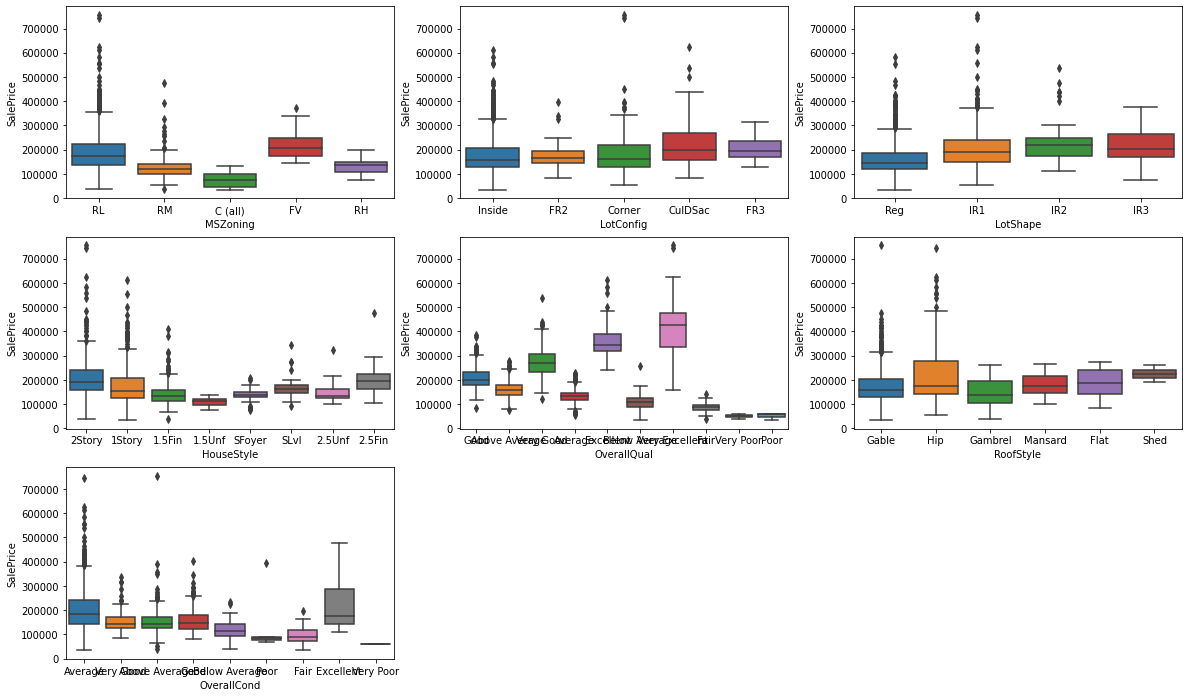

In [37]:
#Visualising categorical Variables to understand data better 
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x ='MSZoning',y='SalePrice',data = house_df)
plt.subplot(3,3,2)
sns.boxplot(x ='LotConfig',y='SalePrice',data = house_df)
plt.subplot(3,3,3)
sns.boxplot(x = 'LotShape',y='SalePrice', data = house_df)
plt.subplot(3,3,4)
sns.boxplot(x ='HouseStyle', y='SalePrice', data = house_df)
plt.subplot(3,3,5)
sns.boxplot(x = 'OverallQual', y='SalePrice', data = house_df)
plt.subplot(3,3,6)
sns.boxplot(x = 'RoofStyle', y='SalePrice', data = house_df)
plt.subplot(3,3,7)
sns.boxplot(x = 'OverallCond', y='SalePrice', data = house_df)
plt.show()

#### Inference from above : Different attributes are analyzed for their influence on Target variable

#### Scatterplot

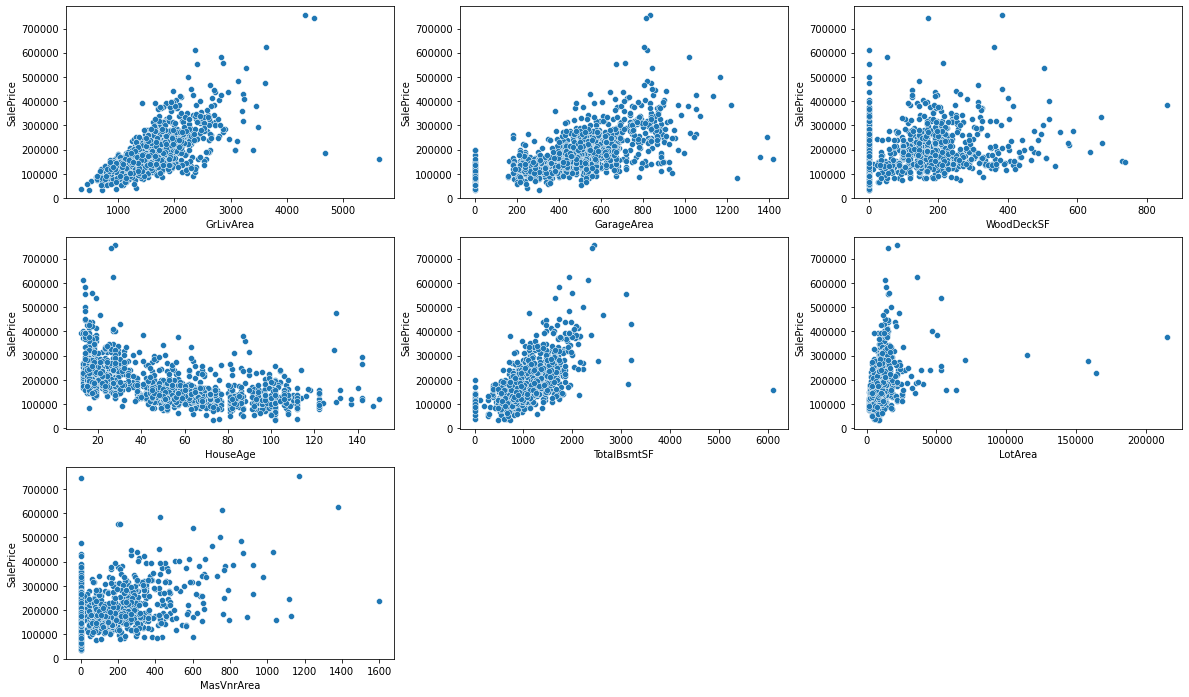

In [38]:
# all numeric (float and int) variables in the dataset
house_numeric = house_df.select_dtypes(include=['number']).columns.values
house_numeric_df = house_df[house_numeric]
house_numeric_df.head()
#View Paiplots to understand correlation

#Visualising categorical Variables to understand data better
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.scatterplot(x ='GrLivArea',y='SalePrice',data = house_df)
plt.subplot(3,3,2)
sns.scatterplot(x ='GarageArea',y='SalePrice',data = house_df)
plt.subplot(3,3,3)
sns.scatterplot(x ='WoodDeckSF',y='SalePrice',data = house_df)
plt.subplot(3,3,4)
sns.scatterplot(x ='HouseAge',y='SalePrice',data = house_df)
plt.subplot(3,3,5)
sns.scatterplot(x ='TotalBsmtSF',y='SalePrice',data = house_df)
plt.subplot(3,3,6)
sns.scatterplot(x ='LotArea',y='SalePrice',data = house_df)
plt.subplot(3,3,7)
sns.scatterplot(x ='MasVnrArea',y='SalePrice',data = house_df)
plt.show()

#### Inference from above : From the variables analyzed above, HouseAge shows negative corrlation to the Target variable. 

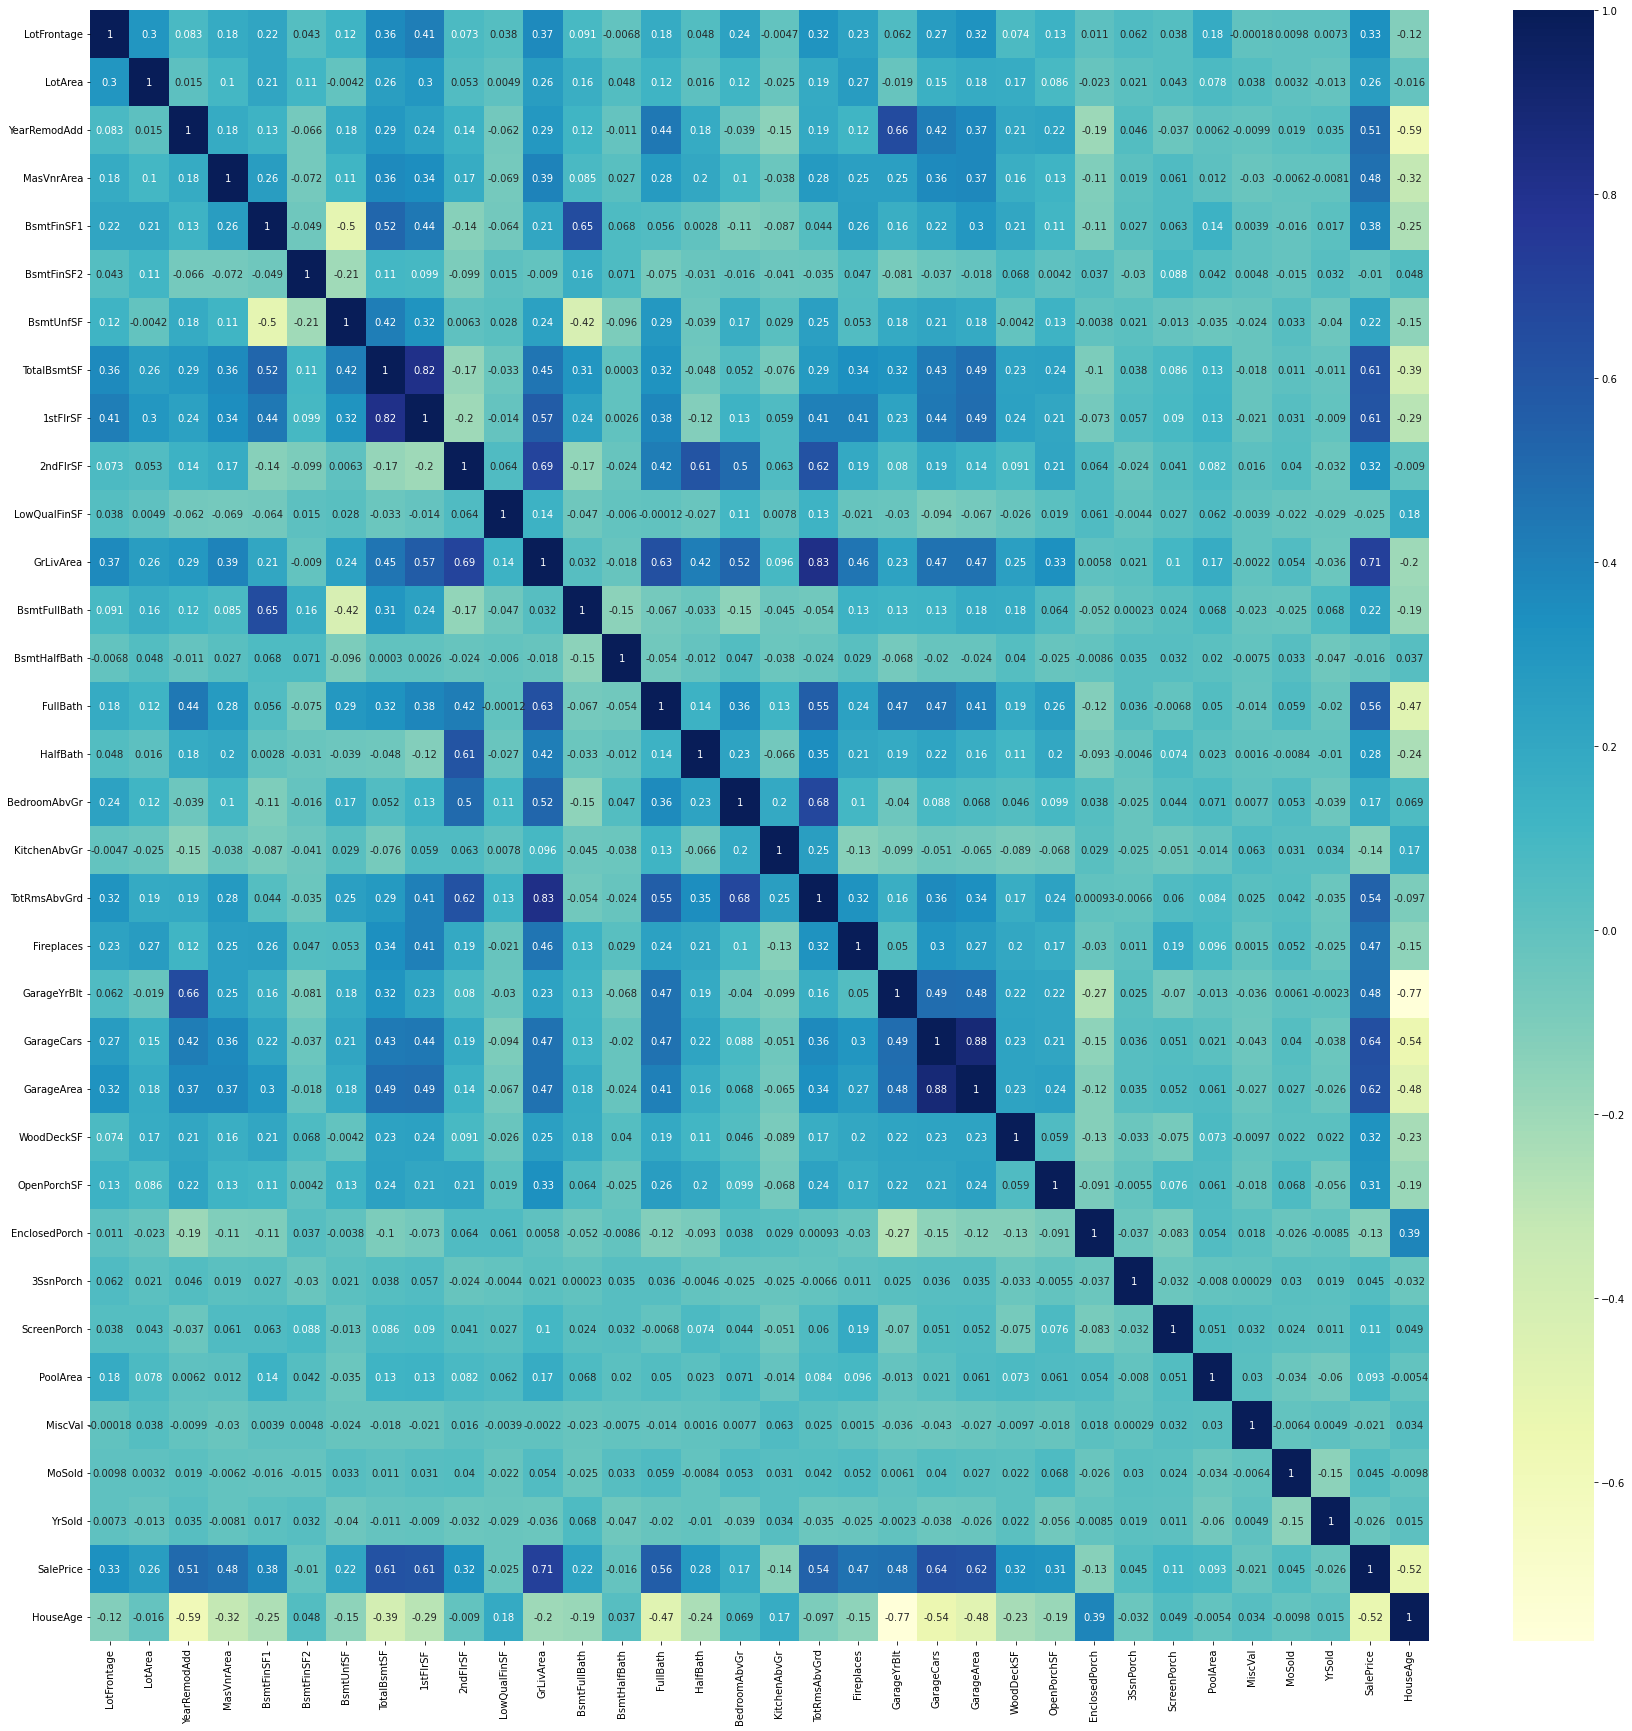

In [39]:
#Plot Correlation map
plt.figure(figsize = (30, 30))
sns.heatmap(house_numeric_df.corr(), annot = True, cmap="YlGnBu")
plt.show()

#### Inference from above : HouseAge shows negative correlation to SalePrice from Corrlation matrix (-0.52)
#### GrLivArea shows high positive correlation (+0.71)to SalePricecompared to other variables

## 3. Data Preparation 


#### Data Preparation

Let's now prepare the data and build the model.

#### Convert categorical values to dummy variables

In [40]:
#Group categorical columns
house_categ_cols = house_df.select_dtypes(include=['object']).columns

# Creating dummy variables
house_categ_dummy = pd.get_dummies(house_df[house_categ_cols], drop_first = True)

# Concating the Dummy DataFrame with the original DataFrame
house_df = pd.concat([house_df,house_categ_dummy], axis = 1)

# Remove the original categorical variables after dummy variabes creation
house_df.drop(house_categ_cols, axis = 1, inplace = True)

#View top 5 rows
house_df.head()



,LotFrontage,LotArea,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,HouseAge,MSSubClass_1-1/2 STORY FINISHED ALL AGES,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES,MSSubClass_2-1/2 STORY ALL AGES,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_2-STORY PUD - 1946 & NEWER,MSSubClass_DUPLEX - ALL STYLES AND AGES,MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER,MSSubClass_SPLIT FOYER,MSSubClass_SPLIT OR MULTI-LEVEL,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_Average,OverallQual_Below Average,OverallQual_Excellent,OverallQual_Fair,OverallQual_Good,OverallQual_Poor,OverallQual_Very Excellent,OverallQual_Very Good,OverallQual_Very Poor,OverallCond_Average,OverallCond_Below Average,OverallCond_Excellent,OverallCond_Fair,OverallCond_Good,OverallCond_Poor,OverallCond_Very Good,OverallCond_Very Poor,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtCond_Gd,BsmtCond_No Basement,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No Basement,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_Fu

In [41]:
# Analyze size of the dataframe
house_df.shape

(1451, 270)

#### Inference from above :  After creating dummy variables the size of the Columns has increased to 270.

### Train Test Split

In [42]:
#Split data for Training and Testing using sklearn library
from sklearn.model_selection import train_test_split
#Allocate 70% of the data to Train the model and 30% to test it - selecting the rows randomly - but making sure that
#everytime the result will be same,i.e, same values in train and test datasets constrained by the random_state value.
df_train, df_test = train_test_split(house_df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [43]:
from sklearn.preprocessing import MinMaxScaler
#instantiate an object
scaler=MinMaxScaler()
#Take the list of numeric variables before converting them to dummy variable - 'house_numeric'

#Fit on data (learns xmin,xmax) and transform (apply scaling to each variable)
df_train[house_numeric] = scaler.fit_transform(df_train[house_numeric])

#Perform transform but do not fit on data. Note that the scaler object is the same Min-Max scaler - 
#which we used #during training.

df_test[house_numeric] = scaler.transform(df_test[house_numeric])

In [44]:
#Create X_train and Y_train.
#Move Traget variable to Y_train
y_train = df_train.pop('SalePrice')
#Keep the remaining in X_train
X_train = df_train
#Keep a backup so that in case a revert back of any of the columns can be performed to main X_train.
X_train_ref = df_train

#Check the size of Train data
print(y_train.shape)
print(X_train.shape)

(1015,)
(1015, 269)


In [45]:
#Create X and y test sets
y_test = df_test.pop('SalePrice')
X_test = df_test

#Check the size of Test data
print(y_test.shape)
print(X_test.shape)

(436,)
(436, 269)


## 3. Model Building and Evaluation

In [46]:
# Perform Automated Feature Selection using recursive feature elimination(RFE) for Linear regression 

# Creating linear regression object for performing RFE
lnreg_model = LinearRegression()
lnreg_model.fit(X_train, y_train)

# Perform recursive feature elimination (RFE) with 200 features
rfe = RFE(estimator=lnreg_model, n_features_to_select=200)
rfe = rfe.fit(X_train, y_train)


In [47]:
# Check the relevance of variables given by RFE with their ranking
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('LotFrontage', True, 1),
 ('LotArea', True, 1),
 ('YearRemodAdd', True, 1),
 ('MasVnrArea', True, 1),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', True, 1),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 37),
 ('BsmtHalfBath', True, 1),
 ('FullBath', False, 22),
 ('HalfBath', False, 52),
 ('BedroomAbvGr', True, 1),
 ('KitchenAbvGr', True, 1),
 ('TotRmsAbvGrd', True, 1),
 ('Fireplaces', False, 5),
 ('GarageYrBlt', True, 1),
 ('GarageCars', True, 1),
 ('GarageArea', False, 32),
 ('WoodDeckSF', True, 1),
 ('OpenPorchSF', True, 1),
 ('EnclosedPorch', True, 1),
 ('3SsnPorch', True, 1),
 ('ScreenPorch', True, 1),
 ('PoolArea', True, 1),
 ('MiscVal', False, 38),
 ('MoSold', False, 61),
 ('YrSold', False, 70),
 ('HouseAge', True, 1),
 ('MSSubClass_1-1/2 STORY FINISHED ALL AGES', True, 1),
 ('MSSubClass_1-STORY 1945 & OLDER', True, 1),
 ('MSSubClass_1-STORY 1946 & NE

## Linear Regression

Let's now try predicting House prices, a dataset using linear regression.

In [48]:
# Instantiate 
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [49]:
# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

-18568803994.45378
[ 4.17825198e-02  2.28760950e-01  5.43518662e-03  3.24810821e-02
 -1.06971602e+10 -2.12275326e+09 -4.42745679e+09  1.15803771e+10
  1.64605870e+11  7.99038836e+10  2.21331823e+10 -2.01365526e+11
  2.09867600e-03 -1.44778579e-02  4.37125085e-03  1.16958843e-03
 -2.70693547e-02 -7.00059355e-02 -1.54241994e-02  4.01396581e-03
  1.35549419e-02  4.74683537e-02 -4.31607108e-03  6.91133149e-03
  7.10510453e-03  6.53763230e-03  3.50726301e-02  9.24545734e-03
  8.67174365e-02 -2.79578845e-03  5.53607933e-04 -5.33897850e-05
 -6.12283618e-02  2.34678984e-02  2.34565735e-02  2.23007202e-02
  1.41086578e-02  2.88527012e-02  3.47194672e-02  8.88824463e-04
  3.25136185e-02  3.14531326e-02  1.44805908e-02  1.87381630e+10
  1.85742378e-02  1.93853378e-02  3.42226028e-02  7.71856308e-02
  7.54059851e-02  6.92205429e-02  5.53514957e-02  3.49636078e-02
  3.53372097e-03 -3.86667252e-03  9.91821289e-05 -2.37751007e-03
 -1.20429993e-02  3.76892090e-03 -7.63416290e-04  1.03759766e-02
 -5.40

In [50]:
# Get predictions from the model
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

# Lets calculate some metrics such as R2 score, RSS and RMSE

print('Linear regression model evaluation')
metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('r2_train_lr : ',r2_train_lr)
metric.append(r2_train_lr)

# Evalution of metrics between predicted and actual
r2_test_lr = r2_score(y_test, y_pred_test)
print('r2_test_lr : ',r2_test_lr)
metric.append(r2_test_lr)

# Evalution of metrics between predicted and actual
rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('rss1_lr : ',rss1_lr)
metric.append(rss1_lr)

# Evalution of metrics between predicted and actual
rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('rss2_lr : ',rss2_lr)
metric.append(rss2_lr)

# Evalution of metrics between predicted and actual
mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('mse_train_lr : ',mse_train_lr)
metric.append(mse_train_lr**0.5)

# Evalution of metrics between predicted and actual
mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('mse_test_lr : ',mse_test_lr)
metric.append(mse_test_lr**0.5)

Linear regression model evaluation
r2_train_lr :  0.9513246699507699
r2_test_lr :  -6.407384475849289e+19
rss1_lr :  0.6137488475060273
rss2_lr :  3.5080767278306224e+20
mse_train_lr :  0.000604678667493623
mse_test_lr :  8.046047540895923e+17


#### Inference from above : r2 test is -ve where as r2_train is doing good 95%. This conveys highly overfit model which works fine in train dataset and fails with test dataset.

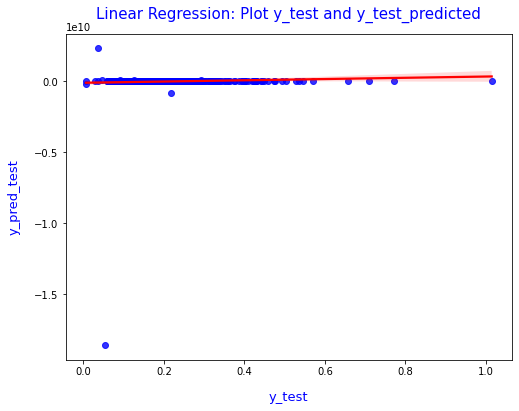

In [51]:
# Plotting y_test and y_test_predicted to understand the variance in test dataset

# Setting the figure size
plt.figure(figsize=(8,6))

#Ploting the regression plot
sns.regplot(y_test,y_pred_test,ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})

# Setting the format of the plot
plt.title('Linear Regression: Plot y_test and y_test_predicted', fontsize=15,color='blue',pad=15)             
plt.xlabel('y_test', fontsize=13,color='blue',labelpad=14)                          
plt.ylabel('y_pred_test', fontsize=13,color='blue',labelpad=14)     

# Displaying the plot usong matplotlib.pyplot
plt.show()

## Ridge and Lasso Regression

Let's now try predicting House prices, a dataset used in simple linear regression, to perform ridge and lasso regression.

## Ridge Regression

In [52]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 
#https://scikit-learn.org/stable/modules/model_evaluation.html

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [53]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 7.0}


In [54]:
#Fitting Ridge model for alpha = 7.0 and printing coefficients which have been penalised
alpha = 7.0
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[-1.63442326e-03  2.23270544e-02  1.16397029e-02  2.51730866e-02
  1.37295242e-02  4.08317694e-03  1.47571583e-02  1.90728829e-02
  4.27821899e-02  5.79194167e-02  4.94948088e-03  5.84992572e-02
  2.87121964e-02 -5.70271347e-03  4.02479562e-02  1.99408478e-02
  1.24997915e-02 -1.42756744e-02  4.91527339e-02  2.99245177e-02
 -6.79849587e-04  4.83328320e-02  1.67807948e-02  2.04856877e-02
  2.44684441e-03  8.69206976e-03  1.50690933e-02  1.54003066e-02
  1.46839403e-02 -2.74204902e-03  1.77428370e-03 -3.46814566e-03
 -3.81106604e-03  4.23769234e-03 -3.71359885e-03  7.12916545e-03
 -9.13609298e-03  5.04876510e-03 -7.12723060e-03  1.60128741e-02
  6.16140966e-03  6.48074335e-05 -1.29789285e-02 -5.02817346e-03
 -5.23312489e-03 -3.20444202e-03 -1.90731015e-05  1.26283035e-02
  1.00325421e-02  1.12671530e-02  1.76777071e-03  1.06508260e-02
  1.47911543e-02 -1.17792267e-02 -2.71274205e-03  1.80229541e-02
  1.24977210e-02  1.79799762e-02 -5.71453848e-03  1.23844018e-02
 -1.12058608e-02 -1.00687

In [55]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('r2_train_lr',r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('r2_test_lr',r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('rss1_lr',rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('rss2_lr',rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('mse_train_lr',mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('mse_test_lr',mse_test_lr)
metric2.append(mse_test_lr**0.5)

r2_train_lr 0.8916705764112098
r2_test_lr 0.8689844152833824
rss1_lr 1.3659292872049842
rss2_lr 0.7173172227448807
mse_train_lr 0.0013457431401034327
mse_test_lr 0.0016452229879469742


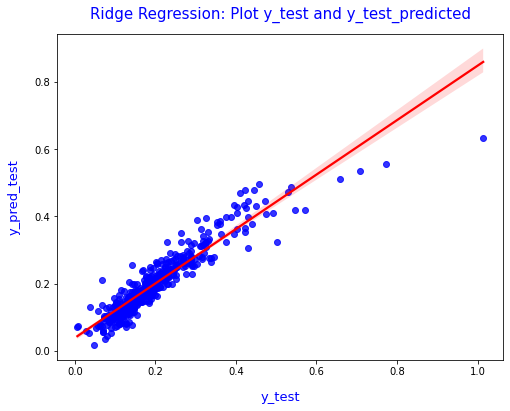

In [56]:
# Plotting y_test and y_test_predicted to understand the variance in test dataset

# Setting the figure size
plt.figure(figsize=(8,6))

#Ploting the regression plot
sns.regplot(y_test,y_pred_test,ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})

# Setting the format of the plot
plt.title('Ridge Regression: Plot y_test and y_test_predicted', fontsize=15,color='blue',pad=15)             
plt.xlabel('y_test', fontsize=13,color='blue',labelpad=14)                          
plt.ylabel('y_pred_test', fontsize=13,color='blue',labelpad=14)     

# Displaying the plot usong matplotlib.pyplot
plt.show()

#### Inference from above : The predicted model will work with unseen dataset as the  plot between y_test and y_pred_test shows predicted values being equally distributed along the best fit line.

## Lasso

In [57]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [58]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.0001}


In [59]:
#Fitting Ridge model for alpha = 0.0001 and printing coefficients which have been penalised

alpha =0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.0001)

In [60]:
lasso.coef_

array([-3.97845222e-03,  5.18689407e-02,  8.59341372e-03,  1.65921778e-02,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  3.47237654e-02, -0.00000000e+00,  2.96687449e-01,
        2.92944223e-02, -0.00000000e+00,  2.76144325e-02,  1.16682696e-02,
        0.00000000e+00, -5.07878984e-02,  2.12451719e-02,  1.94255080e-02,
       -0.00000000e+00,  6.57355680e-02, -0.00000000e+00,  1.28279994e-02,
        0.00000000e+00,  0.00000000e+00,  1.27719886e-02,  1.28872396e-02,
        0.00000000e+00, -0.00000000e+00,  4.32972481e-04, -9.85018111e-04,
       -4.06720429e-03,  9.84970508e-04,  0.00000000e+00,  1.04765348e-02,
       -0.00000000e+00,  0.00000000e+00, -2.68145115e-03, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -7.67626574e-03, -5.72095202e-04,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  5.60257093e-03,
        0.00000000e+00,  6.29724876e-03, -0.00000000e+00,  8.59215914e-03,
        8.42939039e-03, -

In [61]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('r2_train_lr :', r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('r2_test_lr :', r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('rss1_lr :', rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('rss2_lr', rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('mse_train_lr', mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('mse_test_lr', mse_test_lr)
metric3.append(mse_test_lr**0.5)

r2_train_lr : 0.9063298192223214
r2_test_lr : 0.8631132125292782
rss1_lr : 1.1810904094504608
rss2_lr 0.7494623668730052
mse_train_lr 0.0011636358713797645
mse_test_lr 0.0017189503827362504


In [62]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),9.513247e-01,0.891671,0.906330
1,R2 Score (Test),-6.407384e+19,0.868984,0.863113
2,RSS (Train),6.137488e-01,1.365929,1.181090
3,RSS (Test),3.508077e+20,0.717317,0.749462
4,MSE (Train),2.459021e-02,0.036684,0.034112
5,MSE (Test),8.969976e+08,0.040561,0.041460


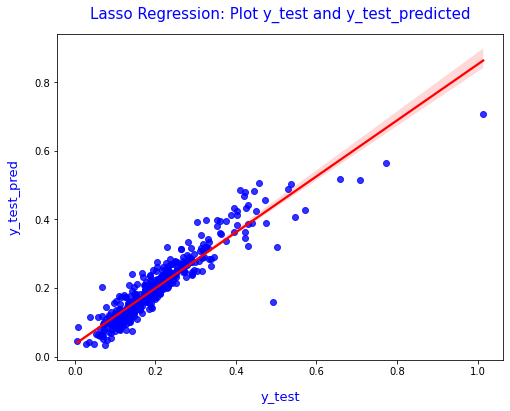

In [63]:
# Plotting y_test and y_test_predicted to understand the variance in test dataset

# Setting the figure size
plt.figure(figsize=(8,6))

#Ploting the regression plot
sns.regplot(y_test,y_pred_test,ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})

# Setting the format of the plot
plt.title('Lasso Regression: Plot y_test and y_test_predicted', fontsize=15,color='blue',pad=15)             
plt.xlabel('y_test', fontsize=13,color='blue',labelpad=14)                          
plt.ylabel('y_test_pred', fontsize=13,color='blue',labelpad=14)     

# Displaying the plot usong matplotlib.pyplot
plt.show()

#### Inference from above : The predicted model will work with unseen dataset as the  plot between y_test and y_pred_test shows predicted values being equally distributed along the best fit line.

## Lets observe the changes in the coefficients after regularization

In [64]:
# Creating a dataframe with variable names from training datset as index
betas = pd.DataFrame(index=X_train.columns)

In [65]:
betas.rows = X_train.columns

In [66]:
#Comparison of Linear, Ridge and Lasso coefficients
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [67]:
pd.set_option('display.max_rows', None)
betas.head(200)

,Linear,Ridge,Lasso
LotFrontage,4.178252e-02,-0.001634,-0.003978
LotArea,2.287609e-01,0.022327,0.051869
YearRemodAdd,5.435187e-03,0.011640,0.008593
MasVnrArea,3.248108e-02,0.025173,0.016592
BsmtFinSF1,-1.069716e+10,0.013730,0.000000
BsmtFinSF2,-2.122753e+09,0.004083,0.000000
BsmtUnfSF,-4.427457e+09,0.014757,0.000000
TotalBsmtSF,1.158038e+10,0.019073,0.000000
1stFlrSF,1.646059e+11,0.042782,0.000000
2ndFlrSF,7.990388e+10,0.057919,0.034724


In [68]:
betasRidge=betas['Ridge']
betasRidge.shape
betasRidge.sort_values(ascending=False)

OverallQual_Excellent                                               0.070613
OverallQual_Very Excellent                                          0.063893
GrLivArea                                                           0.058499
2ndFlrSF                                                            0.057919
Neighborhood_NoRidge                                                0.054106
TotRmsAbvGrd                                                        0.049153
GarageCars                                                          0.048333
1stFlrSF                                                            0.042782
FullBath                                                            0.040248
Neighborhood_NridgHt                                                0.032972
Neighborhood_StoneBr                                                0.032418
Fireplaces                                                          0.029925
RoofMatl_WdShngl                                                    0.029482

### Valid predictors as per Lasso

In [69]:
betas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 269 entries, LotFrontage to SaleCondition_Partial
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Linear  269 non-null    float64
 1   Ridge   269 non-null    float64
 2   Lasso   269 non-null    float64
dtypes: float64(3)
memory usage: 16.5+ KB


In [70]:
betas=betas[betas['Lasso'] > 0.00000]

In [71]:
betasLasso=betas['Lasso']

In [72]:
betasLasso.shape

(74,)

In [73]:
# Finding most relevant variables from Lasso regression in the descending order
betasLasso.sort_values(ascending=False)

GrLivArea                                     0.296687
OverallQual_Very Excellent                    0.126305
OverallQual_Excellent                         0.112040
GarageCars                                    0.065736
Neighborhood_NoRidge                          0.053513
LotArea                                       0.051869
RoofMatl_WdShngl                              0.047036
OverallQual_Very Good                         0.039895
Neighborhood_NridgHt                          0.035272
2ndFlrSF                                      0.034724
RoofMatl_CompShg                              0.031446
Neighborhood_Crawfor                          0.031178
BsmtFullBath                                  0.029294
Neighborhood_StoneBr                          0.029033
Exterior2nd_ImStucc                           0.027643
FullBath                                      0.027614
BsmtExposure_Gd                               0.026243
Exterior1st_BrkFace                           0.024664
SaleType_N

#### I am choosing Lasso because it has selected only the relevant depednent variables by nullying the coefficients of irrelevant variables. The relevant variables for the House price prediction are as shown above in the descending order.

### The top 5 predictors are as following 

#### GrLivArea              -       Above grade (ground) living area square feet                   
#### OverallQual_Very Excellent   - Rates the overall material and finish of the house if Very Excellent or Excellent                                   
#### GarageCars     -                  Size of garage in car capacity             
#### Neighborhood_NoRidge               - Physical locations within Ames city limits Northridge 
#### LotArea    - Lot size in square feet


#### Conclusion :
The variables that are significant in predicting the price of a house are given above. How well the variables describe the price of a house is given by the coefficints in descending order.

The optimal value of lambda for ridge : 7.0
The optimal value of lambda for lasso regression : 0.0001



####################################The End of the Part - 1 House price prediction assignmen#########################


### Part - 2 Assignment

#Qn1 :Question 1

What is the optimal value of alpha for ridge and lasso regression? What will be the changes
in the model if you choose double the value of alpha for both ridge and lasso? What will be 
the most important predictor variables after the change is implemented?

In [74]:
#The optimal value of lambda for ridge : 7.0 The optimal value of lambda for lasso regression : 0.0001
alpha_ridge=7.0
alpha_lasso=0.0001

#Doubling the value of alpha in Ridge and Lasso regression models
new_alpha_ridge = alpha_ridge * 2
new_alpha_lasso = alpha_lasso * 2

##### Ridge with new doubled Alpha

In [75]:
ridgenew = Ridge(alpha=new_alpha_ridge)

ridgenew.fit(X_train, y_train)
print(ridgenew.coef_)

[ 3.87667356e-03  1.48594515e-02  1.38592629e-02  2.25483178e-02
  1.29549362e-02  3.64950113e-03  1.51252121e-02  1.84185919e-02
  3.44905010e-02  4.47289946e-02  5.19281642e-03  4.65138847e-02
  2.42539773e-02 -5.49905923e-03  3.66431085e-02  1.94893057e-02
  1.27715697e-02 -7.49991936e-03  4.45382746e-02  3.20249908e-02
  1.77543584e-03  4.03110280e-02  2.11197333e-02  1.90370153e-02
  4.54125819e-03  6.15887435e-03  8.67774276e-03  1.38492746e-02
  1.03735279e-02 -1.09583680e-03  1.94579156e-03 -3.63707850e-03
 -2.02216633e-03  4.89667927e-03 -5.70389745e-03  8.53379686e-03
 -7.98048754e-03  3.27347442e-03 -5.06726663e-03  1.37484557e-02
  5.40548388e-03  3.04814815e-03 -1.22970188e-02 -3.63994734e-03
 -4.66216517e-03 -3.42980187e-03 -1.41442060e-03  8.20346217e-03
  5.56933511e-03  9.74322225e-03 -2.55348263e-03  7.84852040e-03
  1.33925117e-02 -7.76318166e-03 -3.71982531e-03  1.44576385e-02
  8.42559295e-03  1.34724252e-02 -3.18023037e-03  1.18884833e-02
 -9.73704033e-03 -4.80730

In [76]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridgenew.predict(X_train)
y_pred_test = ridgenew.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('r2_train_lr',r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('r2_test_lr',r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('rss1_lr',rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('rss2_lr',rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('mse_train_lr',mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('mse_test_lr',mse_test_lr)
metric2.append(mse_test_lr**0.5)

r2_train_lr 0.8784665585934773
r2_test_lr 0.8586120901176231
rss1_lr 1.5324191848571629
rss2_lr 0.77410624900769
mse_train_lr 0.001509772595918387
mse_test_lr 0.0017754730481827751


In [77]:
#Ridge coefficients before sorting
betasRidgenew = pd.DataFrame(index=X_train.columns)
betasRidgenew.rows = X_train.columns
betasRidgenew['Ridge'] = ridgenew.coef_
pd.set_option('display.max_rows', None)
betasRidgenew.head(200)

,Ridge
LotFrontage,0.003877
LotArea,0.014859
YearRemodAdd,0.013859
MasVnrArea,0.022548
BsmtFinSF1,0.012955
BsmtFinSF2,0.003650
BsmtUnfSF,0.015125
TotalBsmtSF,0.018419
1stFlrSF,0.034491
2ndFlrSF,0.044729


In [78]:
#Ridge coefficiants after sorting
betasRidgenew.sort_values(by="Ridge",ascending=False)

,Ridge
OverallQual_Excellent,0.057242
OverallQual_Very Excellent,0.048727
Neighborhood_NoRidge,0.046575
GrLivArea,0.046514
2ndFlrSF,0.044729
TotRmsAbvGrd,0.044538
GarageCars,0.040311
FullBath,0.036643
1stFlrSF,0.034491
Fireplaces,0.032025


##### Lasso with new doubled Alpha

In [79]:
lassonew = Lasso(alpha=new_alpha_lasso)       
lassonew.fit(X_train, y_train) 

Lasso(alpha=0.0002)

In [80]:
lassonew.coef_

array([-0.00000000e+00,  4.23280804e-04,  1.27359282e-02,  5.55420003e-03,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  2.38969082e-02, -0.00000000e+00,  2.73382002e-01,
        2.82122362e-02, -0.00000000e+00,  2.79143550e-02,  1.26018132e-02,
        0.00000000e+00, -1.01764432e-02,  2.26133461e-02,  2.34232689e-02,
        0.00000000e+00,  6.59241947e-02,  0.00000000e+00,  1.38783072e-02,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  1.09050036e-02,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -1.08312439e-03,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  1.58430274e-02,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -1.24078896e-02, -3.28693493e-03,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  3.82233182e-03,
        0.00000000e+00,  9.65954179e-03, -0.00000000e+00,  0.00000000e+00,
        1.10270168e-02, -

In [81]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
print('Lasso Results')
y_pred_train = lassonew.predict(X_train)
y_pred_test = lassonew.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('r2_train_lr')
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('r2_test_lr')
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('rss1_lr')
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('rss2_lr')
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('mse_train_lr')
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('mse_test_lr')
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)
betasLassonew = pd.DataFrame(index=X_train.columns)

Lasso Results
r2_train_lr
0.8917500895973911
r2_test_lr
0.8639432920783412
rss1_lr
1.3649267028089263
rss2_lr
0.744917637648012
mse_train_lr
0.0013447553722255431
mse_test_lr
0.0017085266918532385


In [82]:
betasLassonew.rows = X_train.columns
betasLassonew['Lasso'] =lassonew.coef_
pd.set_option('display.max_rows', None)
betasLassonew.head(200)

,Lasso
LotFrontage,-0.000000
LotArea,0.000423
YearRemodAdd,0.012736
MasVnrArea,0.005554
BsmtFinSF1,0.000000
BsmtFinSF2,0.000000
BsmtUnfSF,0.000000
TotalBsmtSF,0.000000
1stFlrSF,0.000000
2ndFlrSF,0.023897


In [83]:
betasnew=betasLassonew[betasLassonew['Lasso'] > 0.00000]

In [84]:
betasnew.shape

(59, 1)

In [85]:
betasnew.sort_values(by="Lasso",ascending=False)

,Lasso
GrLivArea,0.273382
OverallQual_Very Excellent,0.125255
OverallQual_Excellent,0.119114
GarageCars,0.065924
Neighborhood_NoRidge,0.054597
OverallQual_Very Good,0.042686
Neighborhood_NridgHt,0.036108
BsmtExposure_Gd,0.029650
Neighborhood_Crawfor,0.029386
BsmtFullBath,0.028212


##### Question 3:

In [86]:
betassorted =betasLasso.sort_values(ascending=False)

In [87]:
# Selecting top 5 best features returned from Lasso Model
betassorted.index.tolist()

['GrLivArea',
 'OverallQual_Very Excellent',
 'OverallQual_Excellent',
 'GarageCars',
 'Neighborhood_NoRidge',
 'LotArea',
 'RoofMatl_WdShngl',
 'OverallQual_Very Good',
 'Neighborhood_NridgHt',
 '2ndFlrSF',
 'RoofMatl_CompShg',
 'Neighborhood_Crawfor',
 'BsmtFullBath',
 'Neighborhood_StoneBr',
 'Exterior2nd_ImStucc',
 'FullBath',
 'BsmtExposure_Gd',
 'Exterior1st_BrkFace',
 'SaleType_New',
 'TotRmsAbvGrd',
 'Fireplaces',
 'OverallCond_Excellent',
 'MasVnrArea',
 'Neighborhood_Somerst',
 'Functional_Typ',
 'BsmtCond_TA',
 'LandContour_Lvl',
 'LotConfig_CulDSac',
 'ScreenPorch',
 'WoodDeckSF',
 'LandContour_Low',
 '3SsnPorch',
 'OverallQual_Good',
 'HalfBath',
 'LandContour_HLS',
 'HouseStyle_1.5Unf',
 'Exterior2nd_CmentBd',
 'MSSubClass_1-STORY 1946 & NEWER ALL STYLES',
 'Condition1_Norm',
 'HouseStyle_1Story',
 'BsmtFinType1_GLQ',
 'OverallCond_Good',
 'Neighborhood_BrkSide',
 'YearRemodAdd',
 'Street_Pave',
 'LotShape_IR2',
 'BsmtCond_Gd',
 'Neighborhood_Veenker',
 'CentralAir_Y',
 '

In [88]:
#Top 5 variables to a list
top5=betassorted.index.tolist()[:5]

In [89]:
#Display Top 5 variables
top5

['GrLivArea',
 'OverallQual_Very Excellent',
 'OverallQual_Excellent',
 'GarageCars',
 'Neighborhood_NoRidge']

In [90]:
 #Dropping the five most important predictor variables in the lasso model
X_train_new = X_train.drop(top5, axis = 1)

In [91]:
X_test_new = X_test.drop(top5, axis = 1)

In [92]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso,
                       param_grid = params,
                       scoring= 'neg_mean_absolute_error',
                       cv = folds,
                       return_train_score=True,
                       verbose = 1)            

model_cv.fit(X_train_new, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [93]:
print(model_cv.best_params_)

{'alpha': 0.0001}


In [94]:
#Fitting Lasso model for alpha = 0.0001 and printing coefficients which have been penalised

alpha =0.0001

lassorem = Lasso(alpha=alpha)
       
lassorem.fit(X_train_new, y_train) 

Lasso(alpha=0.0001)

In [95]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
print('Lasso Results')
y_pred_train = lassorem.predict(X_train_new)
y_pred_test = lassorem.predict(X_test_new)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('r2_train_lr')
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('r2_test_lr')
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('rss1_lr')
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('rss2_lr')
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('mse_train_lr')
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('mse_test_lr')
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

Lasso Results
r2_train_lr
0.8898330091164469
r2_test_lr
0.863573106236925
rss1_lr
1.3890992340391364
rss2_lr
0.7469444246156727
mse_train_lr
0.0013685706739301835
mse_test_lr
0.001713175285815763


In [96]:
betasLassorem = pd.DataFrame(index=X_train_new.columns)

In [97]:
betasLassorem['Lasso'] =lassorem.coef_
pd.set_option('display.max_rows', None)
betasLassorem.head(200)

,Lasso
LotFrontage,-0.000000
LotArea,0.056454
YearRemodAdd,0.009230
MasVnrArea,0.049157
BsmtFinSF1,0.000000
BsmtFinSF2,-0.000000
BsmtUnfSF,0.002688
TotalBsmtSF,0.000000
1stFlrSF,0.291342
2ndFlrSF,0.188718


In [98]:
betasLassorem=betasLassorem[betasLassorem['Lasso'] > 0.00000]

In [99]:
betasLassorem.shape

(62, 1)

In [100]:
betasLassorem.sort_values(by="Lasso",ascending=False)

,Lasso
1stFlrSF,0.291342
2ndFlrSF,0.188718
RoofMatl_WdShngl,0.100376
LotArea,0.056454
MasVnrArea,0.049157
Exterior2nd_ImStucc,0.045337
RoofMatl_CompShg,0.040619
GarageArea,0.038371
Neighborhood_StoneBr,0.036328
BsmtFullBath,0.034900
